<a href="https://colab.research.google.com/github/Talat12520/Tweets-Sentiment-Analysis/blob/main/TweetsSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Sentiment Analysis of Tweets

Objective: Classify tweets as positive, negative, or neutral.

Algorithm: Naive Bayes.

Dataset: Twitter dataset.



      author                                            content country  \
0  katyperry  Is history repeating itself...?#DONTNORMALIZEH...     NaN   
1  katyperry  @barackobama Thank you for your incredible gra...     NaN   
2  katyperry                Life goals. https://t.co/XIn1qKMKQl     NaN   
3  katyperry            Me right now 🙏🏻 https://t.co/gW55C1wrwd     NaN   
4  katyperry  SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...     NaN   

          date_time            id language  latitude  longitude  \
0  12/01/2017 19:52  8.196330e+17       en       NaN        NaN   
1  11/01/2017 08:38  8.191010e+17       en       NaN        NaN   
2  11/01/2017 02:52  8.190140e+17       en       NaN        NaN   
3  11/01/2017 02:44  8.190120e+17       en       NaN        NaN   
4  10/01/2017 05:22  8.186890e+17       en       NaN        NaN   

   number_of_likes  number_of_shares  
0             7900              3472  
1             3689              1380  
2            10341           

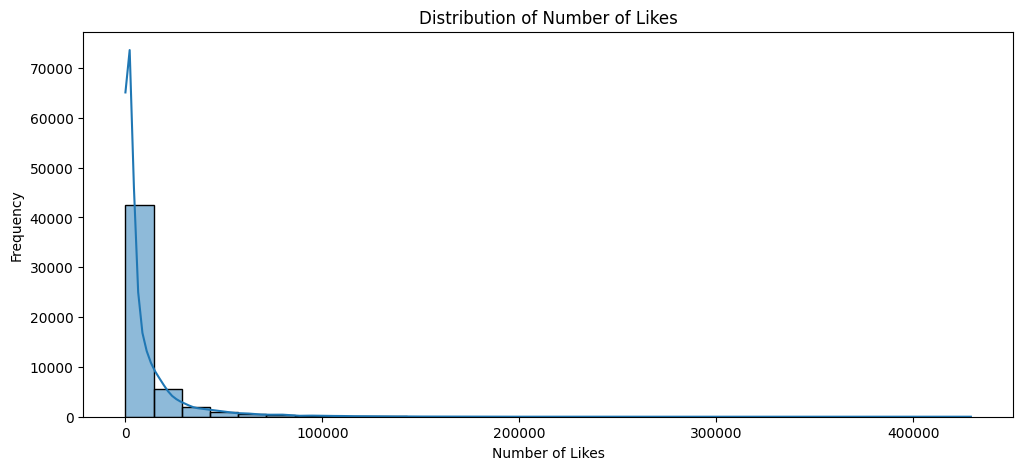

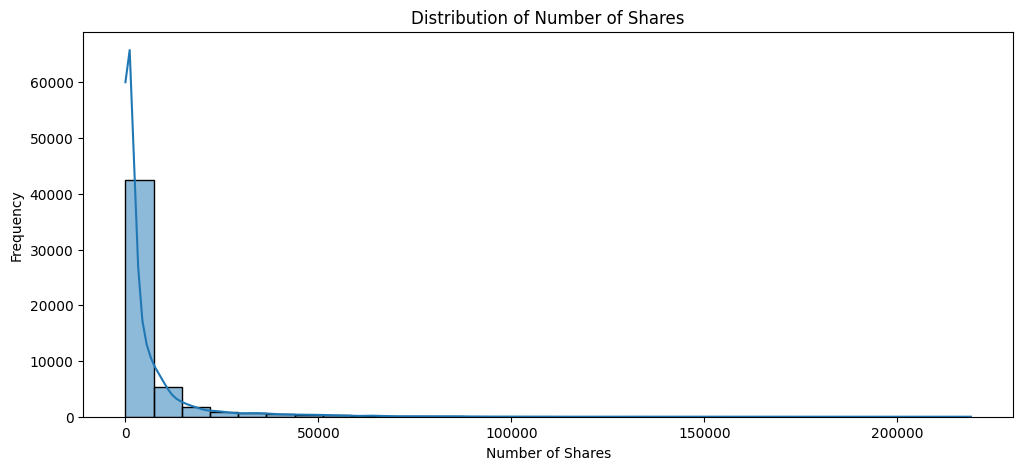

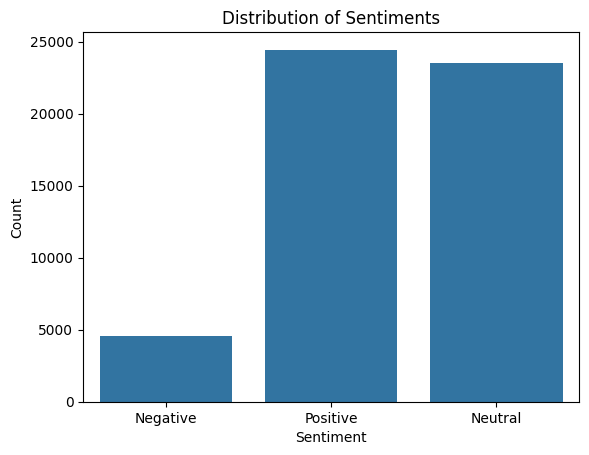

Accuracy: 0.7549719288229136
              precision    recall  f1-score   support

           0       0.69      0.16      0.26       887
           1       0.68      0.96      0.80      4931
           2       0.91      0.65      0.76      4691

    accuracy                           0.75     10509
   macro avg       0.76      0.59      0.61     10509
weighted avg       0.78      0.75      0.74     10509



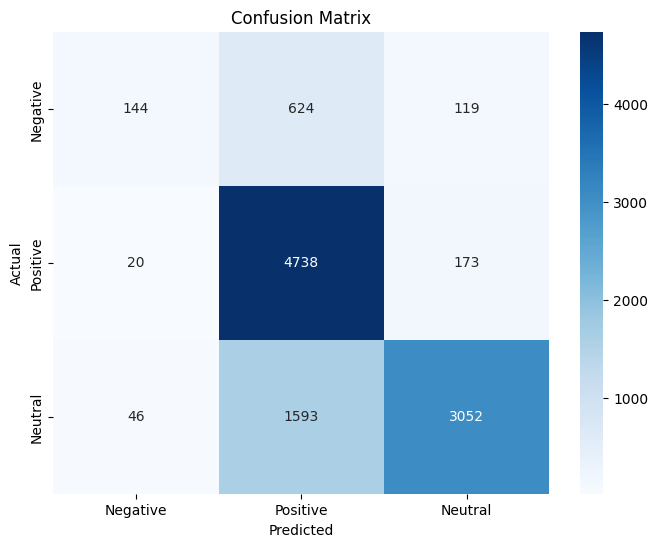

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob
# Load dataset
data = pd.read_csv('tweets.csv')

# Display the first few rows of the dataset
print(data.head())
# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of likes and shares
plt.figure(figsize=(12, 5))
sns.histplot(data['number_of_likes'], bins=30, kde=True)
plt.title('Distribution of Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data['number_of_shares'], bins=30, kde=True)
plt.title('Distribution of Number of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.show()
# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 1  # Positive
    elif analysis.sentiment.polarity < 0:
        return 0  # Negative
    else:
        return 2  # Neutral

# Apply sentiment analysis to the content
data['sentiment'] = data['content'].apply(get_sentiment)

# Check the distribution of sentiments
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Positive', 'Neutral'])
plt.show()
# Prepare features and labels
X = data['content']
y = data['sentiment']

# Text vectorization
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()